In [1]:
import pybaseball
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['text.usetex'] = True

## Plotting Hit Position

Plotting the hit position of all batted outs, singles, doubles, triples and home runs between 7-4-2022 and 7-6-2022

In [2]:
sample = pybaseball.statcast('2022-07-04', '2022-07-06')

This is a large query, it may take a moment to complete


100%|██████████| 3/3 [00:00<00:00, 10.05it/s]


In [3]:
sample = sample[sample['hc_x'].notnull() & sample['hc_y'].notnull() & sample['events'].notnull()]
sample['normalized_hc_x'] = sample.apply(lambda row: row['hc_x'] - 128, axis=1)
sample['normalized_hc_y'] = sample.apply(lambda row: 200 - row['hc_y'], axis=1)
out = sample[~sample['events'].isin(['single', 'double', 'triple', 'home_run'])]
single = sample[sample['events'] == 'single']
double = sample[sample['events'] == 'double']
triple = sample[sample['events'] == 'triple']
home_run = sample[sample['events'] == 'home_run']

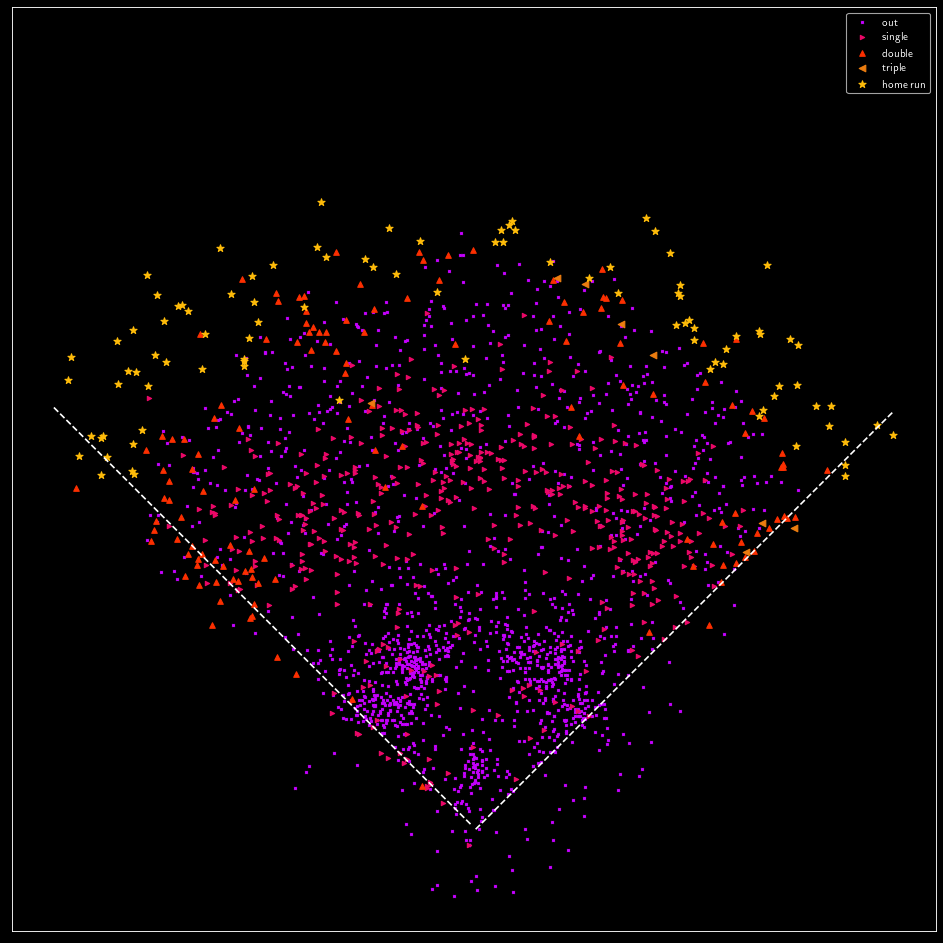

In [4]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 15), dpi=80)
plt.scatter(out['normalized_hc_x'], out['normalized_hc_y'], s=5, c=utils.EVENT_COLOR['out'], marker=utils.EVENT_MARKER['out'], label='out')
plt.scatter(single['normalized_hc_x'], single['normalized_hc_y'], s=15, c=utils.EVENT_COLOR['single'], marker=utils.EVENT_MARKER['single'], label='single')
plt.scatter(double['normalized_hc_x'], double['normalized_hc_y'], s=25, c=utils.EVENT_COLOR['double'], marker=utils.EVENT_MARKER['double'], label='double')
plt.scatter(triple['normalized_hc_x'], triple['normalized_hc_y'], s=35, c=utils.EVENT_COLOR['triple'], marker=utils.EVENT_MARKER['triple'], label='triple')
plt.scatter(home_run['normalized_hc_x'], home_run['normalized_hc_y'], s=45, c=utils.EVENT_COLOR['home_run'], marker=utils.EVENT_MARKER['home_run'], label='home run')
plt.legend()
plt.plot(np.arange(-120, 0), np.arange(120, 0, step=-1), c='white', linestyle='dashed')
plt.plot(np.arange(120), c='white', linestyle='dashed')
plt.axis('square')
plt.xticks([])
plt.yticks([])
plt.show()

## Launch Speed

Distribution of launch speed and outcome of batted balls between 7-4-2022 and 7-6-2022. Expected outcome is computed by the average outcome from all batted balls within a particular window of launch speeds.

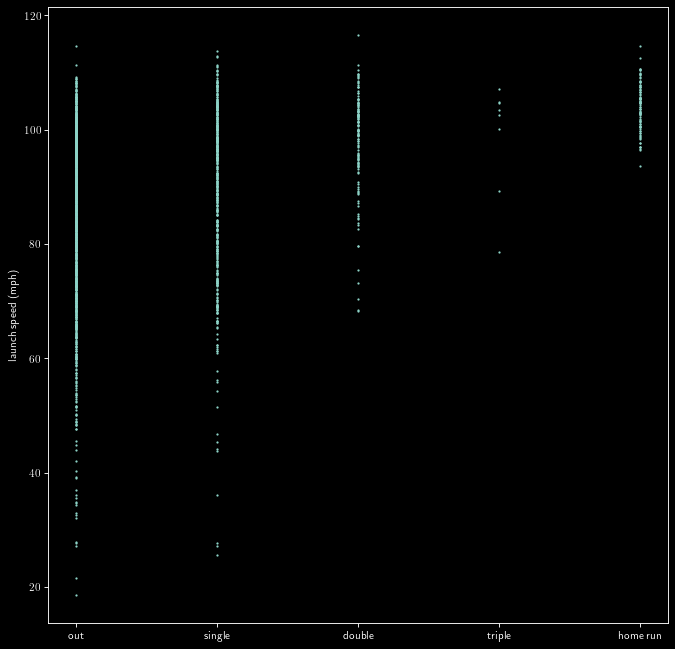

In [5]:
sample_all_fields = sample[sample['launch_speed'].notnull()]
sample_all_fields = sample_all_fields.sort_values(by=['launch_speed'], ascending=True, ignore_index=True)
sample_all_fields['result'] = sample_all_fields.apply(lambda row: utils.EVENT_VALUE.get(row['events'], 0), axis=1)
speeds = sample_all_fields['launch_speed'].to_numpy()
results = sample_all_fields['result'].to_numpy()

plt.figure(figsize=(10, 10), dpi=80)
plt.ylabel('launch speed (mph)')
plt.scatter(results, speeds, s=1)
plt.xticks([0, 1, 2, 3, 4], ['out', 'single', 'double', 'triple', 'home run'])
plt.show()

/var/folders/x7/jz6hp53x0bx8q7dgr58tb54h0000gn/T/ipykernel_4059/1008438857.py:12: RuntimeWarning: invalid value encountered in true_divide
  bucket_avg = bucket_sums / bucket_freqs


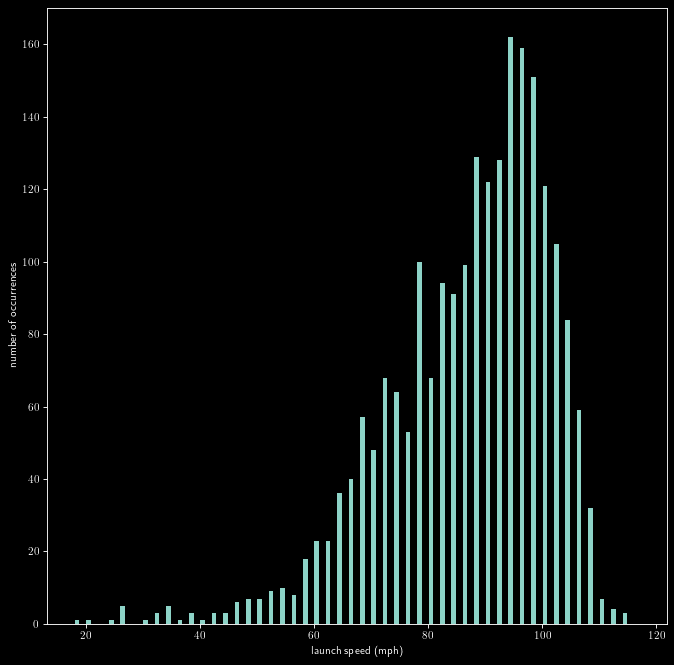

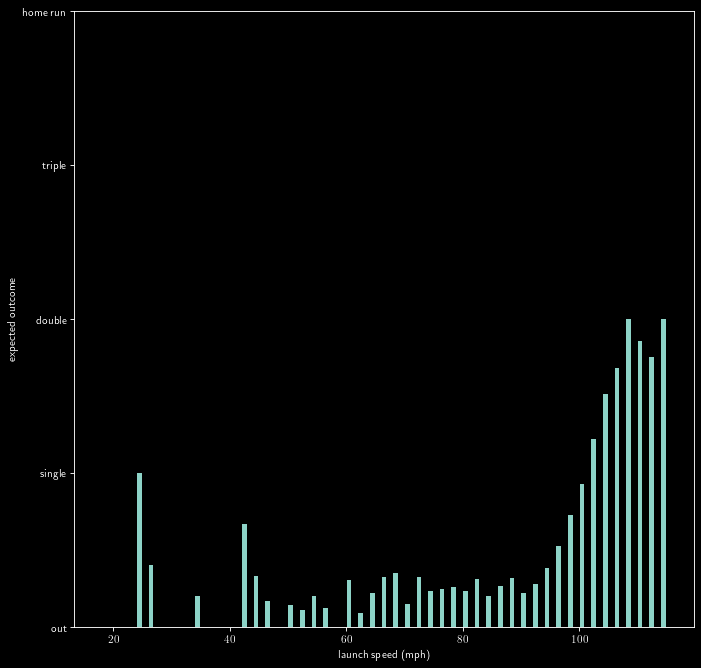

In [6]:
min_speed = np.amin(speeds)
max_speed = np.amax(speeds)
num_buckets = 50
bucket_freqs = np.zeros(num_buckets)
bucket_sums = np.zeros(num_buckets)
bucket_width = (max_speed + 0.001 - min_speed) / (num_buckets - 1)
buckets = np.arange(min_speed, max_speed + bucket_width, bucket_width)
for i in range(len(speeds)):
    bucket_idx = int((speeds[i] - min_speed) / bucket_width)
    bucket_freqs[bucket_idx] += 1
    bucket_sums[bucket_idx] += results[i]
bucket_avg = bucket_sums / bucket_freqs

plt.figure(figsize=(10, 10), dpi=80)
plt.ylabel('number of occurrences')
plt.xlabel('launch speed (mph)')
plt.bar(buckets, bucket_freqs)
plt.show()

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(buckets, bucket_avg)
plt.xlabel('launch speed (mph)')
plt.ylabel('expected outcome')
plt.yticks([0, 1, 2, 3, 4], ['out', 'single', 'double', 'triple', 'home run'])
plt.show()

## Vertical Launch Angle

Distribution of vertical launch angle and outcome of batted balls between 7-4-2022 and 7-6-2022. Expected outcome is computed by the average outcome from all batted balls within a particular window of vertical launch angles.

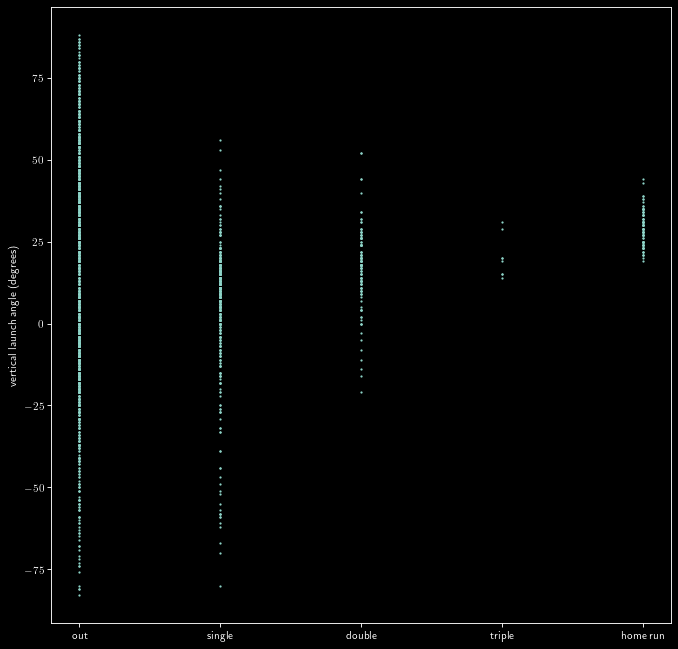

In [7]:
sample_all_fields = sample[sample['launch_angle'].notnull()]
sample_all_fields = sample_all_fields.sort_values(by=['launch_angle'], ascending=True, ignore_index=True)
sample_all_fields['result'] = sample_all_fields.apply(lambda row: utils.EVENT_VALUE.get(row['events'], 0), axis=1)
angles = sample_all_fields['launch_angle'].to_numpy()
results = sample_all_fields['result'].to_numpy()

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(results, angles, s=1)
plt.xticks([0, 1, 2, 3, 4], ['out', 'single', 'double', 'triple', 'home run'])
plt.ylabel('vertical launch angle (degrees)')
plt.show()

/var/folders/x7/jz6hp53x0bx8q7dgr58tb54h0000gn/T/ipykernel_4059/3529208187.py:12: RuntimeWarning: invalid value encountered in true_divide
  bucket_avg = bucket_sums / bucket_freqs


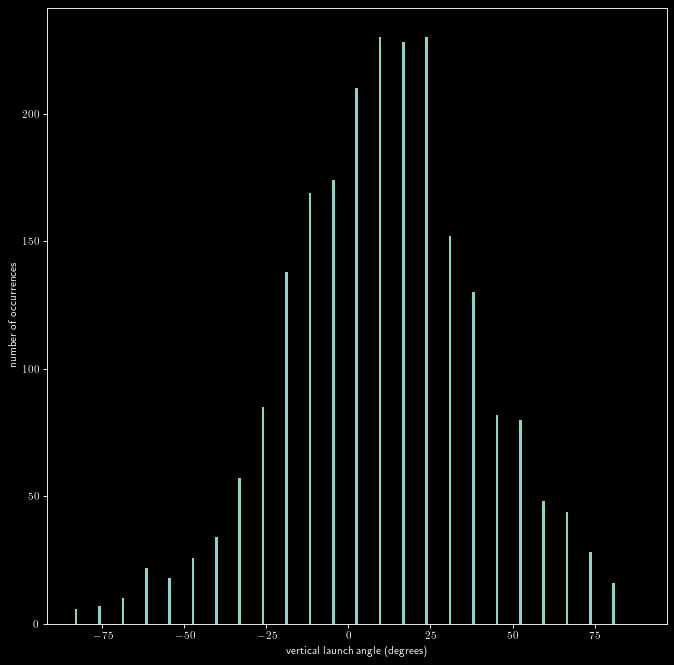

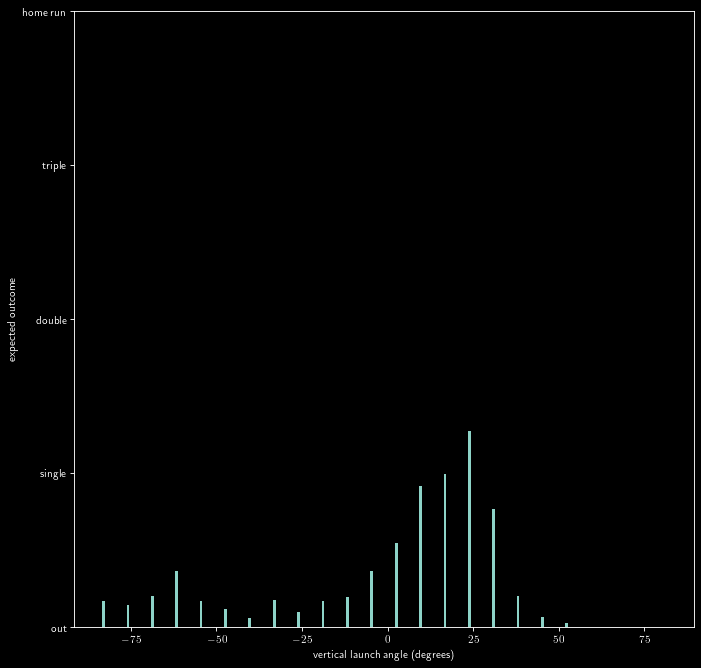

In [8]:
min_angle = np.amin(angles)
max_angle = np.amax(angles)
num_buckets = 25
bucket_freqs = np.zeros(num_buckets)
bucket_sums = np.zeros(num_buckets)
bucket_width = (max_angle + 0.001 - min_angle) / (num_buckets - 1)
buckets = np.arange(min_angle, max_angle + bucket_width, bucket_width)
for i in range(len(angles)):
    bucket_idx = int((angles[i] - min_angle) / bucket_width)
    bucket_freqs[bucket_idx] += 1
    bucket_sums[bucket_idx] += results[i]
bucket_avg = bucket_sums / bucket_freqs

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(buckets, bucket_freqs)
plt.xlabel('vertical launch angle (degrees)')
plt.ylabel('number of occurrences')
plt.show()

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(buckets, bucket_avg)
plt.yticks([0, 1, 2, 3, 4], ['out', 'single', 'double', 'triple', 'home run'])
plt.xlabel('vertical launch angle (degrees)')
plt.ylabel('expected outcome')
plt.show()

## Horizontal Launch Angle

Distribution of horizontal launch angle and outcome of batted balls between 7-4-2022 and 7-6-2022. Expected outcome is computed by the average outcome from all batted balls within a particular window of horizontal launch angles.

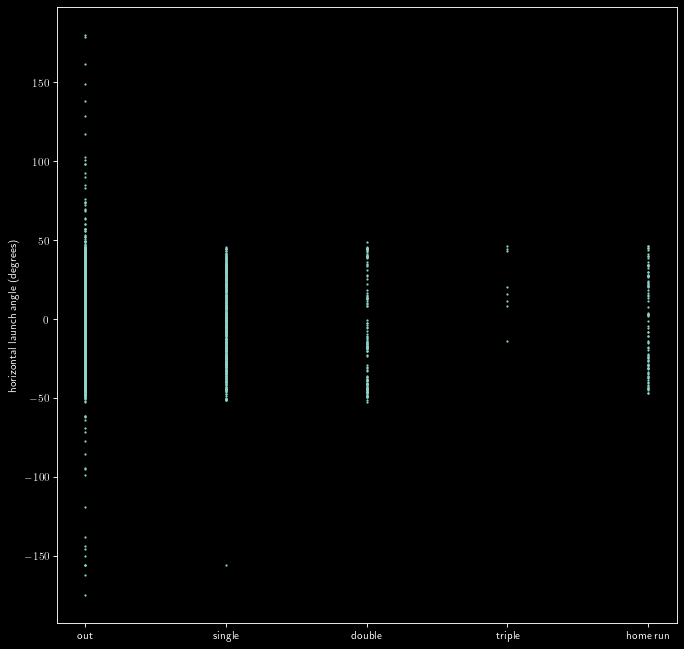

In [9]:
sample_all_fields['horizontal_angle'] = sample_all_fields.apply(lambda row: utils.horizontal_angle(row['hc_x'], row['hc_y']), axis=1)
sample_all_fields = sample_all_fields.sort_values(by=['horizontal_angle'], ascending=True, ignore_index=True)
sample_all_fields['result'] = sample_all_fields.apply(lambda row: utils.EVENT_VALUE.get(row['events'], 0), axis=1)
angles = sample_all_fields['horizontal_angle'].to_numpy()
results = sample_all_fields['result'].to_numpy()

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(results, angles, s=1)
plt.ylabel('horizontal launch angle (degrees)')
plt.xticks([0, 1, 2, 3, 4], ['out', 'single', 'double', 'triple', 'home run'])
plt.show()

/var/folders/x7/jz6hp53x0bx8q7dgr58tb54h0000gn/T/ipykernel_4059/37908292.py:12: RuntimeWarning: invalid value encountered in true_divide
  bucket_avg = bucket_sums / bucket_freqs


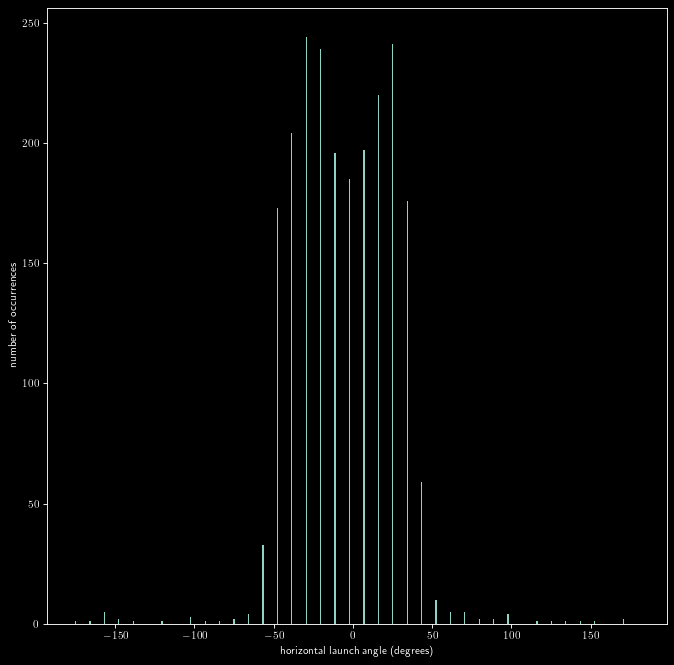

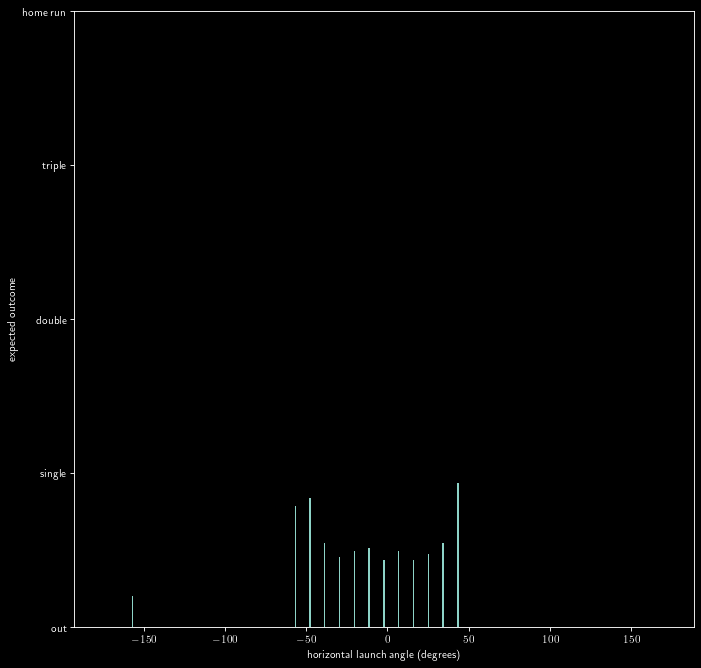

In [10]:
min_angle = np.amin(angles)
max_angle = np.amax(angles)
num_buckets = 40
bucket_freqs = np.zeros(num_buckets)
bucket_sums = np.zeros(num_buckets)
bucket_width = (max_angle + 0.001 - min_angle) / (num_buckets - 1)
buckets = np.arange(min_angle, max_angle + bucket_width, bucket_width)
for i in range(len(angles)):
    bucket_idx = int((angles[i] - min_angle) / bucket_width)
    bucket_freqs[bucket_idx] += 1
    bucket_sums[bucket_idx] += results[i]
bucket_avg = bucket_sums / bucket_freqs

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(buckets, bucket_freqs)
plt.xlabel('horizontal launch angle (degrees)')
plt.ylabel('number of occurrences')
plt.show()

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(buckets, bucket_avg)
plt.xlabel('horizontal launch angle (degrees)')
plt.ylabel('expected outcome')
plt.yticks([0, 1, 2, 3, 4], ['out', 'single', 'double', 'triple', 'home run'])
plt.show()